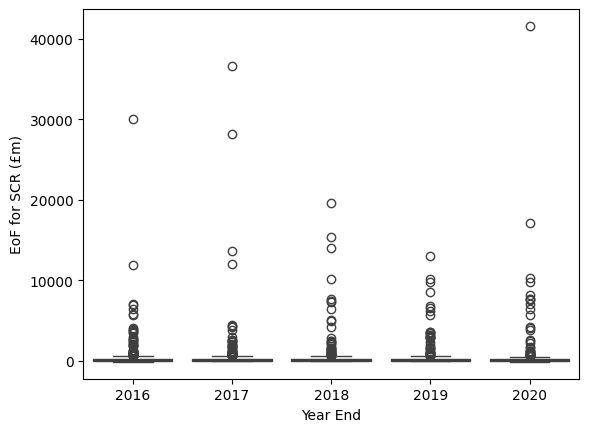

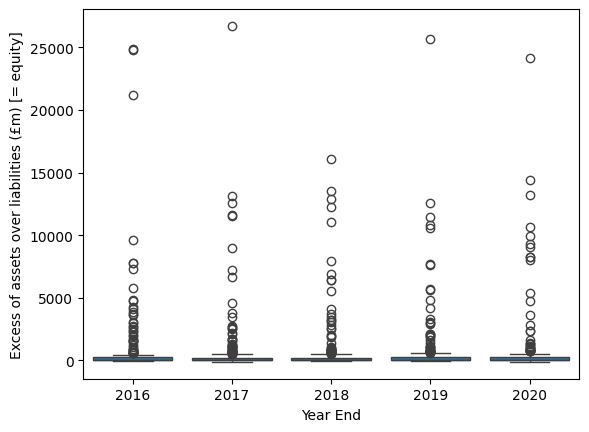

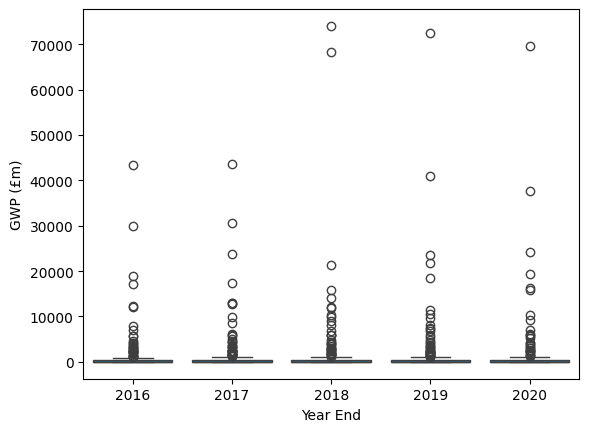

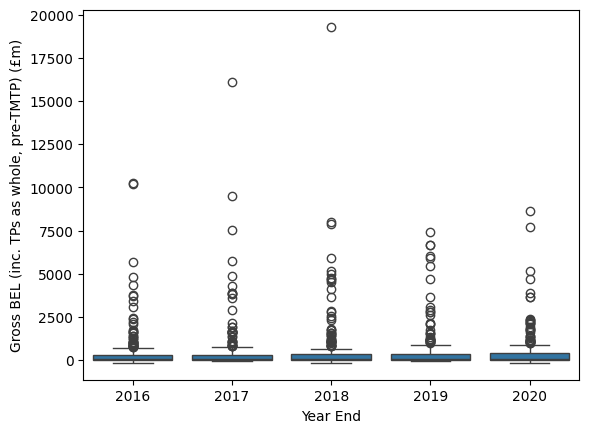

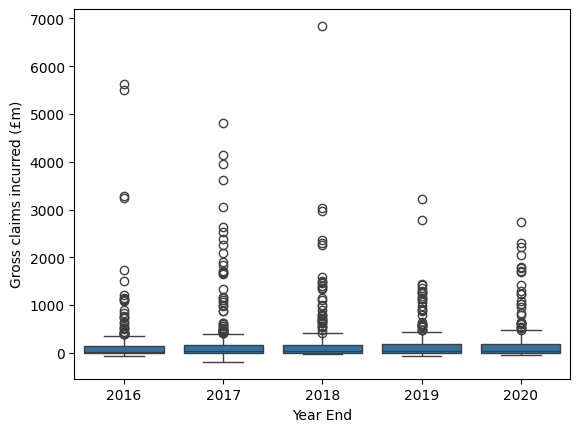

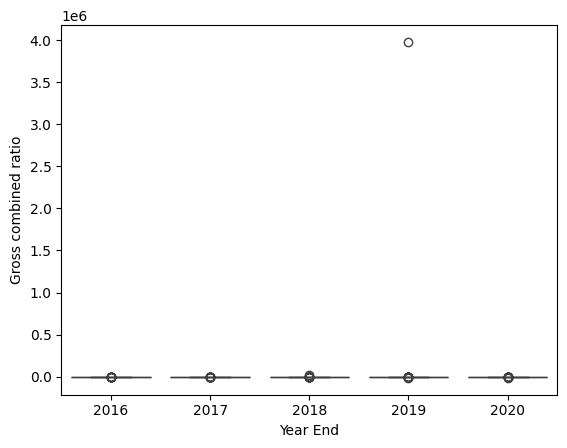

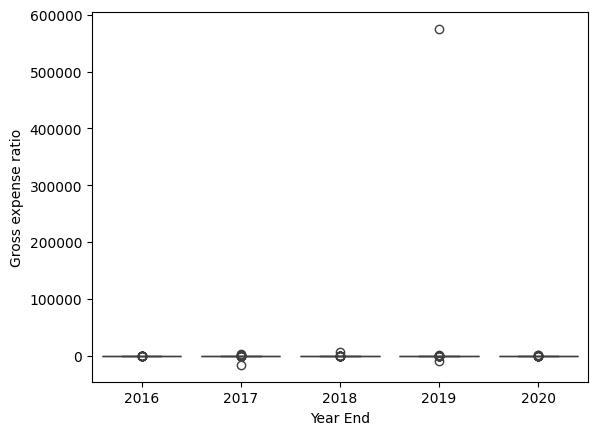

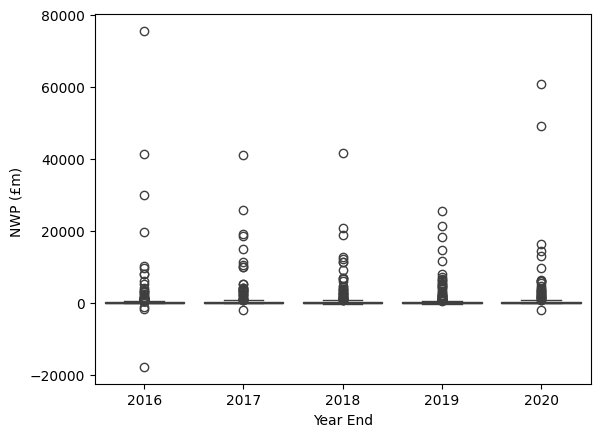

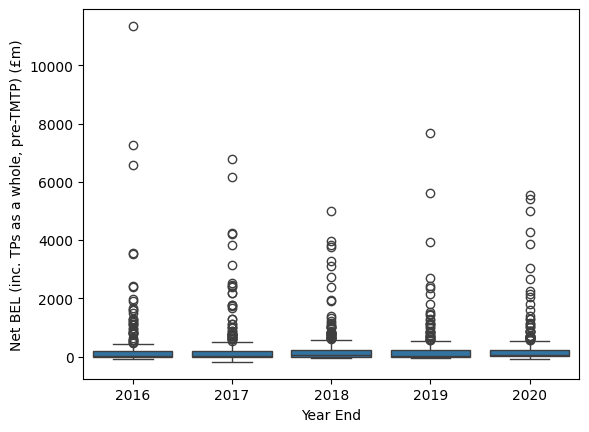

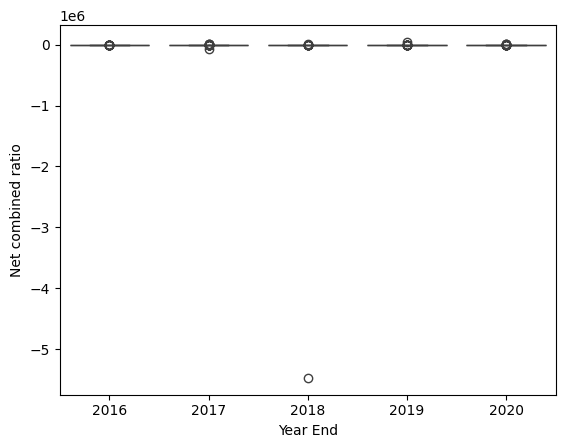

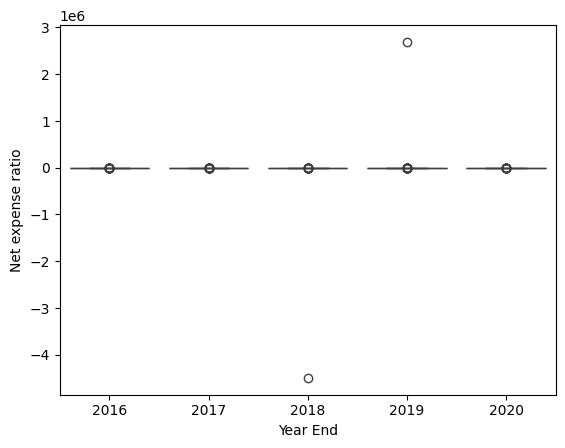

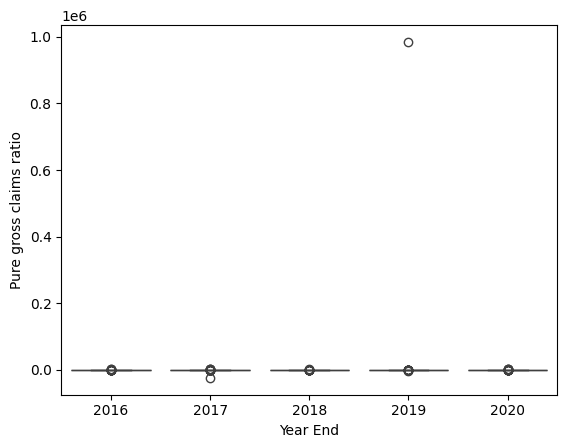

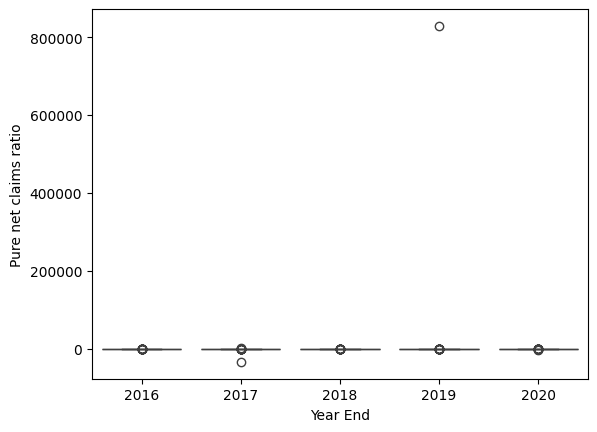

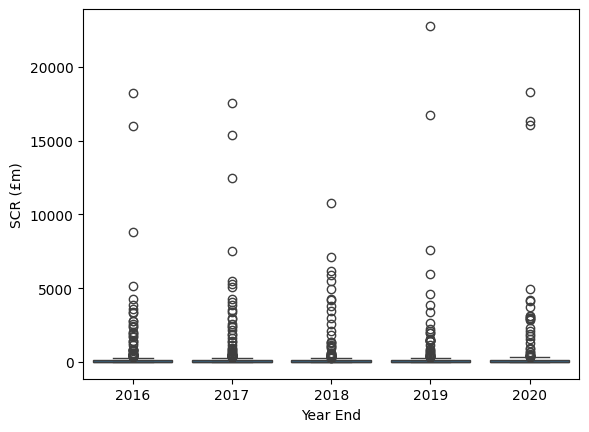

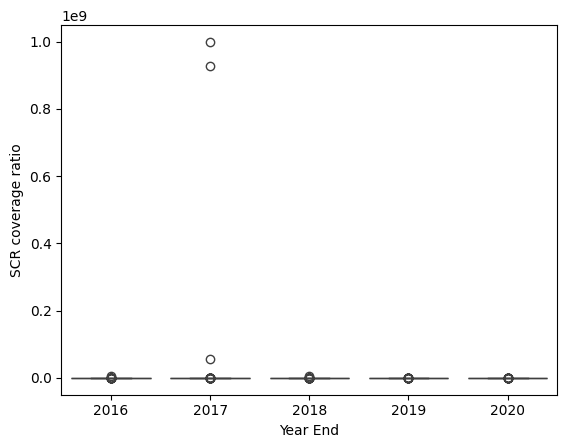

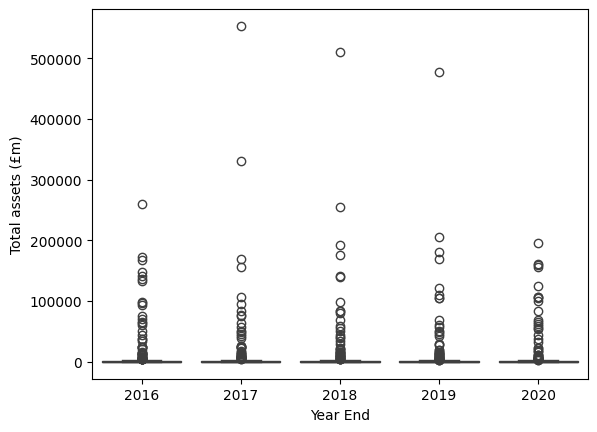

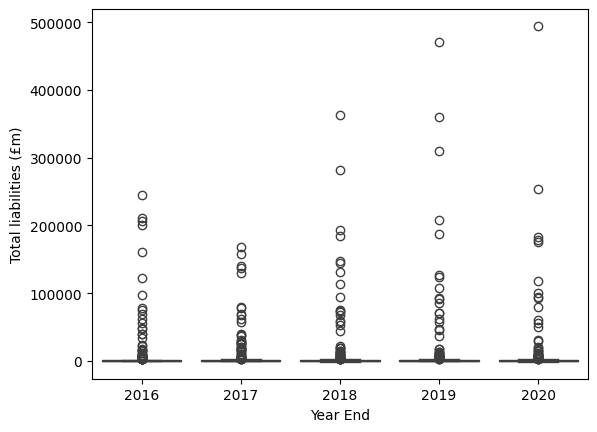

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('clean_dataset.csv')

# Configure data type to String
df['Year End'] = df['Year End'].astype(str)

# List numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

for column in numeric_cols:   
    sns.boxplot(data=df, x='Year End', y=column)
    plt.show()

In [7]:


# Calculate quantiles and IQR
Q1 = df[numeric_cols].quantile(0.25) 
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[numeric_cols] < (Q1 - 5 * IQR)) | (df[numeric_cols] > (Q3 + 5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df_no_outlier = df[condition]

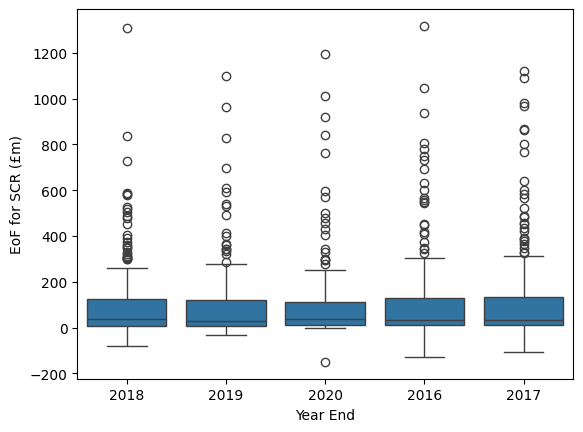

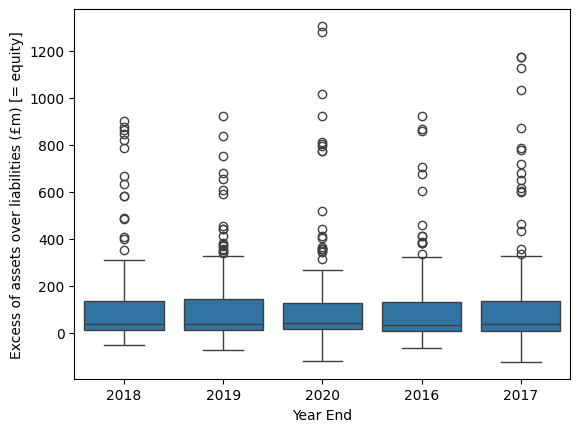

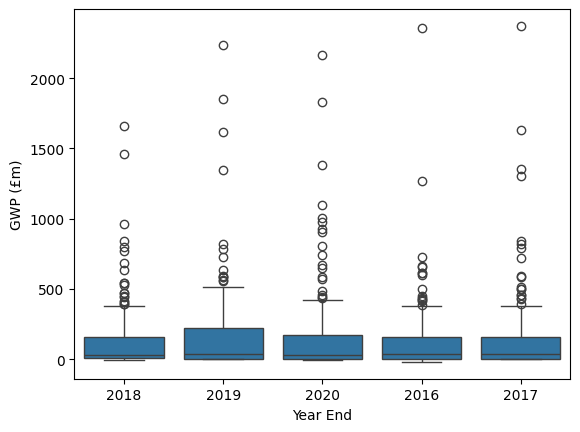

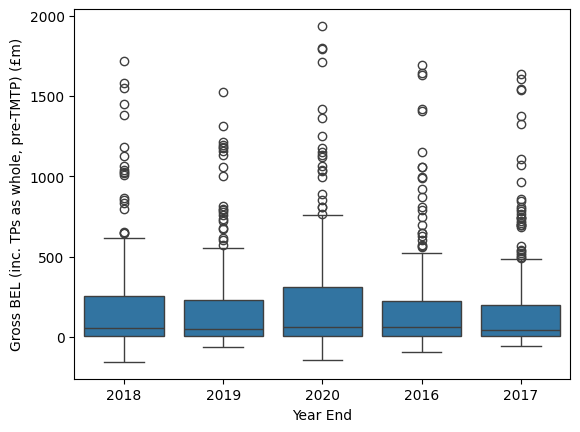

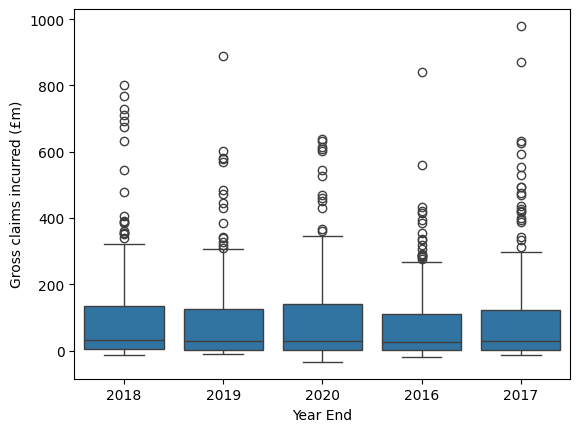

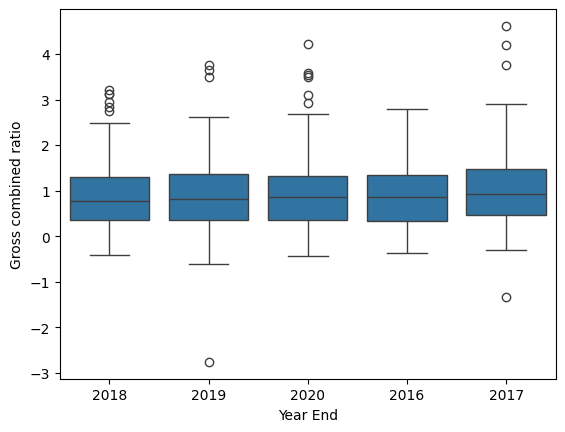

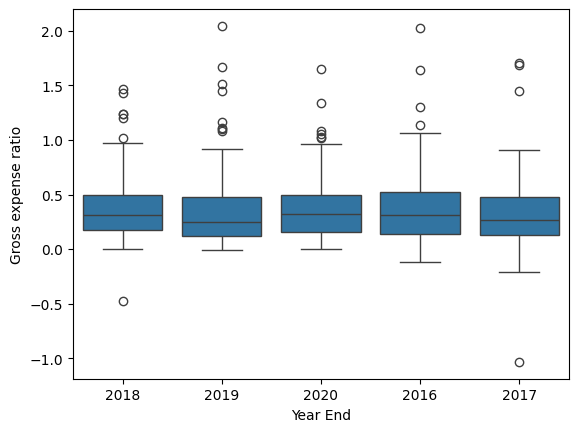

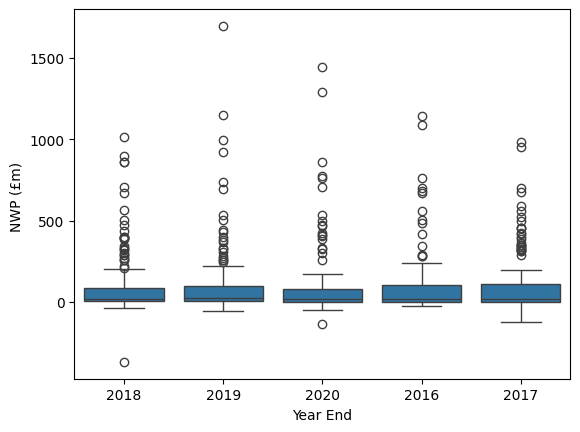

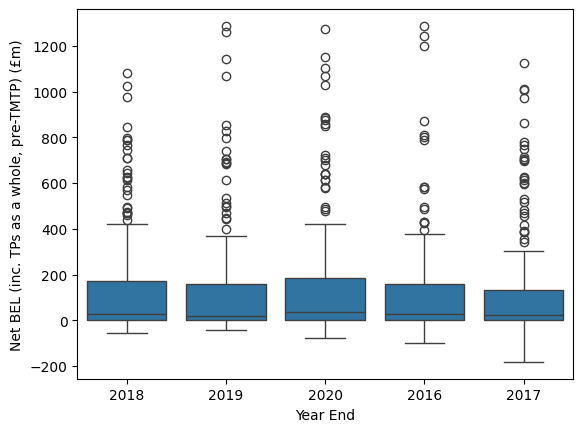

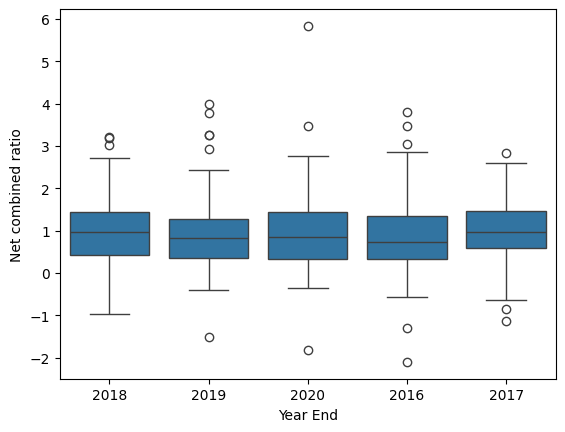

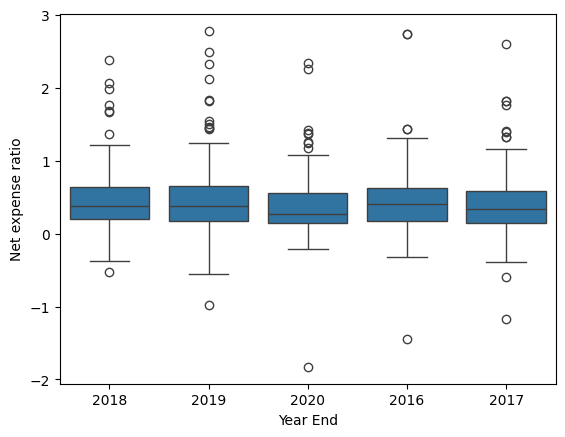

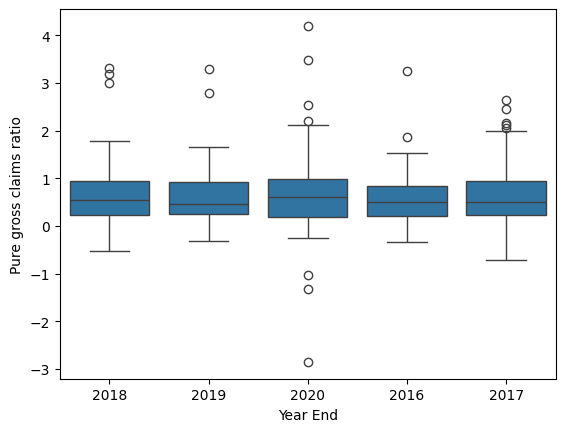

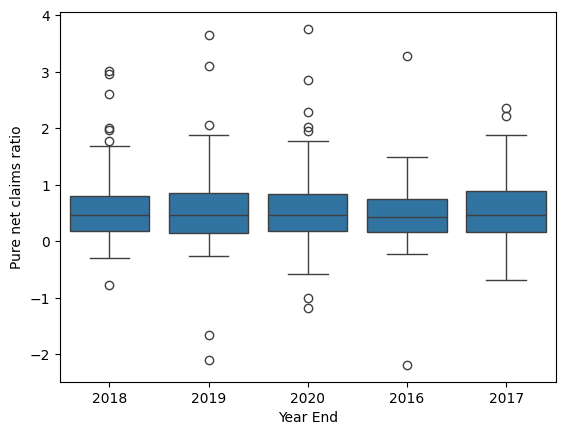

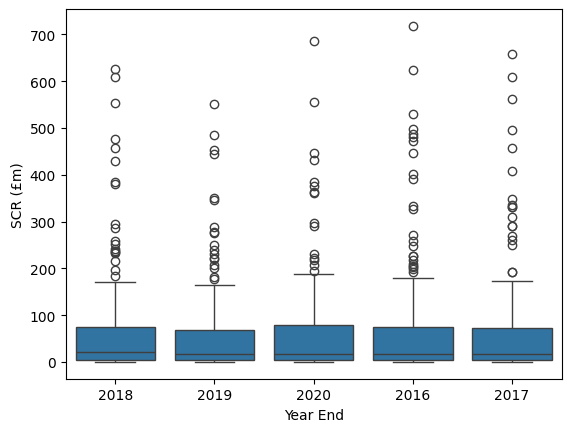

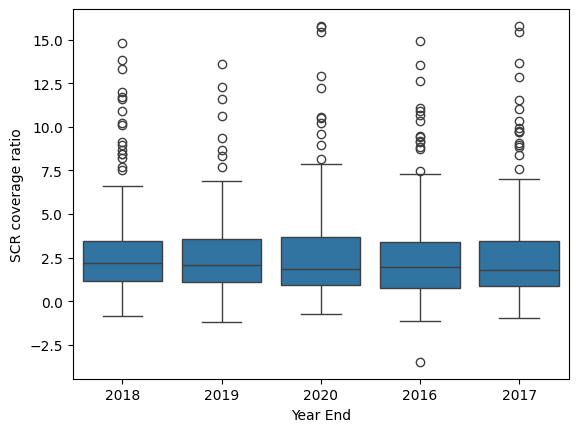

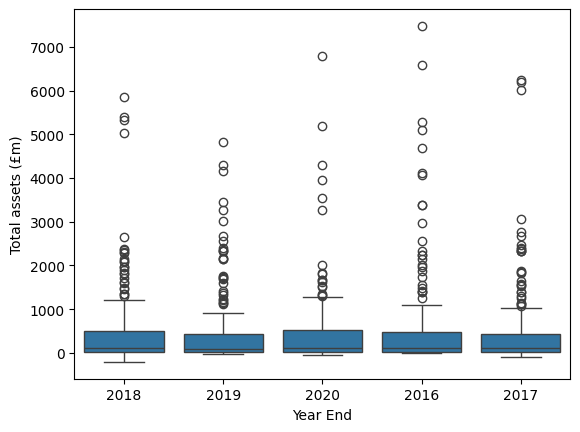

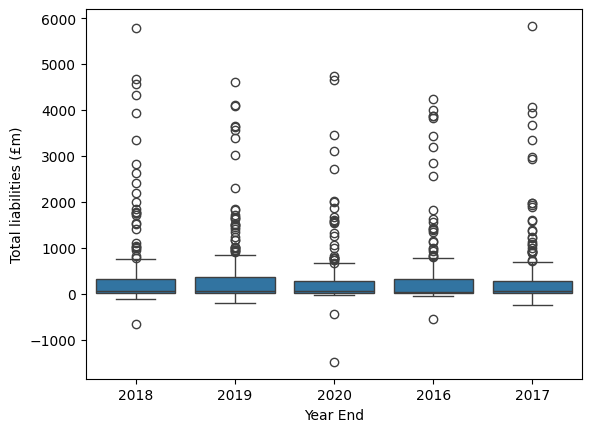

In [8]:
for cols in numeric_cols:   
    sns.boxplot(data=df_no_outlier, x='Year End', y=cols)
    plt.show()

In [9]:
df_no_outlier.to_csv('clean_dataset_2.csv', encoding='utf-8', index=False)